# FFT

Fast Fourier Transform (FFT) is a method to numerically evaluate Discrete Fourier Transform (DFT) efficiently. DFT is defined as the calculation of the following expression:

$$F\left(\frac{n}{N}\right) = \sum_{k=0}^{N-1} f(k) e^{-i 2 \pi k \frac{n}{N} }$$

* $F(\frac{n}{N})$ is the result of DFT for $\frac{n}{N}$ cycles/sample frequency.
* the range of frequencies from 0 to (number of samples/2) is used

## sampling the sin(t) function

Parameters:

* frequency: 1 Hz
* amplitude: 5

Sampling:

* 3 seconds interval
* number of samples is 30

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper function for plotting:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


In [2]:
tmax = 3.0  # total time
num_s = 30 # number of samples
mps = (num_s-1)/tmax # samples/second
print("%.5f samples/second (Hz)" % mps)

t = np.linspace(0, tmax, num_s)

# there is one period (2 pi) between x = 0 and x = 1, hence this is a 1 Hz signal with amplitude 5
f_hz = 1.0
ampl = 5
f = lambda x: ampl * np.sin(f_hz * 2*np.pi*x)
    
s_f = [f(i) for i in t]  # sampled f

9.66667 samples/second (Hz)


<StemContainer object of 3 artists>

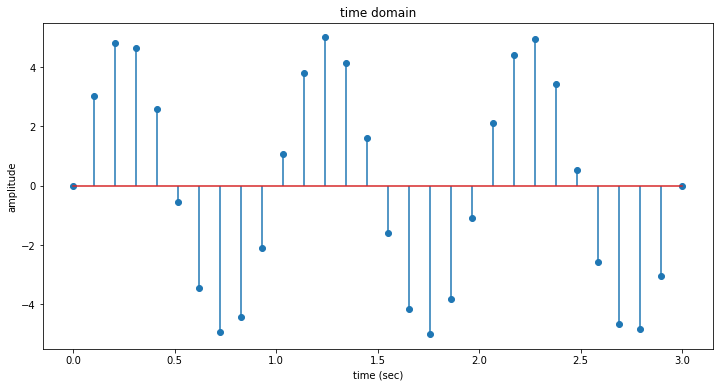

In [3]:
setup_graph(title='time domain', x_label='time (sec)', y_label='amplitude', fig_size=(12,6))
#print(t, s_f)
plt.stem(t, s_f)

## FFT calculation

We use NumPy function for calculation. This function evaluates the following sum:
$$ y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n] \, $$

In [4]:
fft_f = np.fft.fft(s_f)

We plot real and imaginary parts of the transform (spectrum):

<StemContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

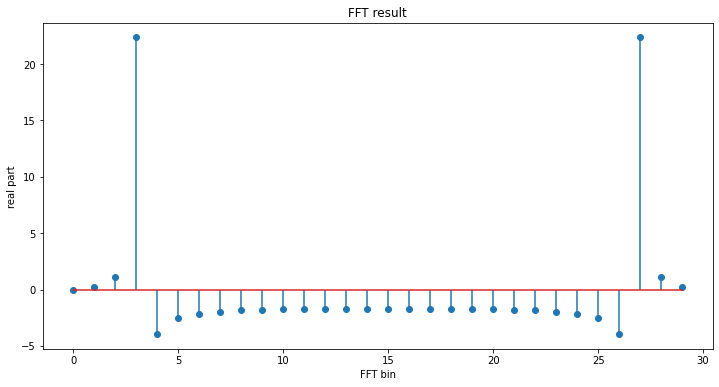

<Figure size 432x288 with 0 Axes>

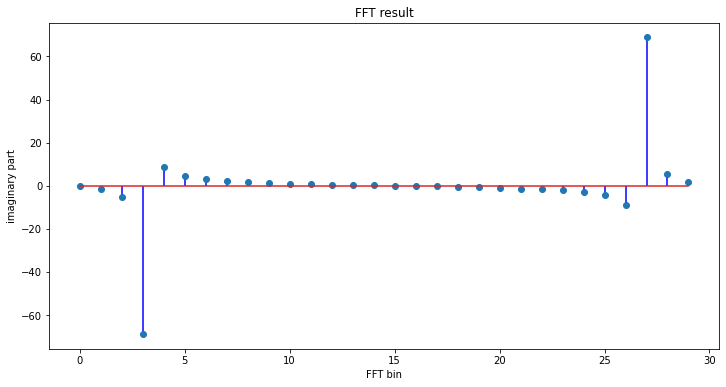

In [5]:
x= np.r_[0:30:1]
plt.figure()
setup_graph(title='FFT result', x_label='FFT bin', y_label='real part', fig_size=(12,6))
plt.stem(x,fft_f.real)
plt.figure()
setup_graph(title='FFT result', x_label='FFT bin', y_label='imaginary part', fig_size=(12,6))
plt.stem(x,np.imag(fft_f),'b-')


### Why is it symmetric?

Because for a real input function $f(t)$ the second part of the transform is always a mirrored image of the first part. 

Calculated values are always in the following sequence: If `A = fft(a, n)`, then `A[0]` is the zero frequency component (average of the signal), which is always real for a real signal. `A[1:n/2]` contains terms with positive and `A[n/2+1:]` terms with negative frequencies in decreasing order. For even number of data `A[n/2]` contains both the positive and the negative Nyquist frequency term, which is always real for a real input signal. For odd number of data `A[(n-1)/2]`is the term with maximum positive frequency, while `A[(n+1)/2]`is the term with maximum negative frequency. The function `np.fft.fftshift(A)` shifts the resulting vector by putting zero frequency in the middle, while `np.fft.ifftshift(A)` makes the opposite.

In most cases we work with real functions, hence a real transform may be used: `np.fft.rfft()`

/home/tg/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/tg/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/tg/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

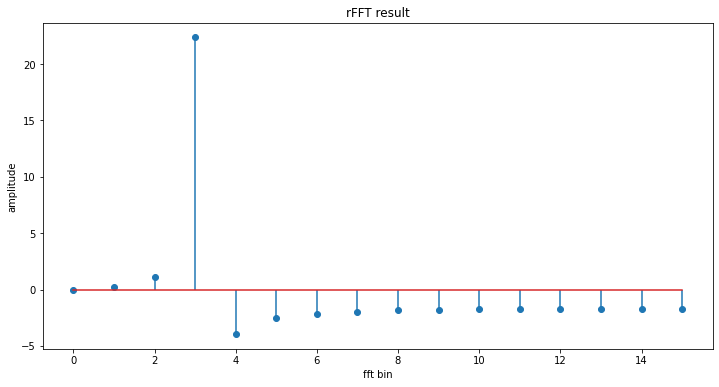

In [6]:
rfft_f = np.fft.rfft(s_f)
setup_graph(title='rFFT result', x_label='fft bin', y_label='amplitude', fig_size=(12,6))
plt.stem(rfft_f)

### Frequency axis scaling

Instead of fft bin horizontal axis uses frequency units.


In [7]:
rf = [(i*1.0/num_s)*mps for i in range(num_s//2+1)]
# it can be seen that frequencies range from 0 to 4.8333 Hz, which is the Nyquist frequency (half sampling frequency)
rf

[0.0,
 0.3222222222222222,
 0.6444444444444444,
 0.9666666666666667,
 1.2888888888888888,
 1.611111111111111,
 1.9333333333333333,
 2.2555555555555555,
 2.5777777777777775,
 2.9,
 3.222222222222222,
 3.544444444444444,
 3.8666666666666667,
 4.188888888888889,
 4.511111111111111,
 4.833333333333333]

/home/tg/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/tg/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

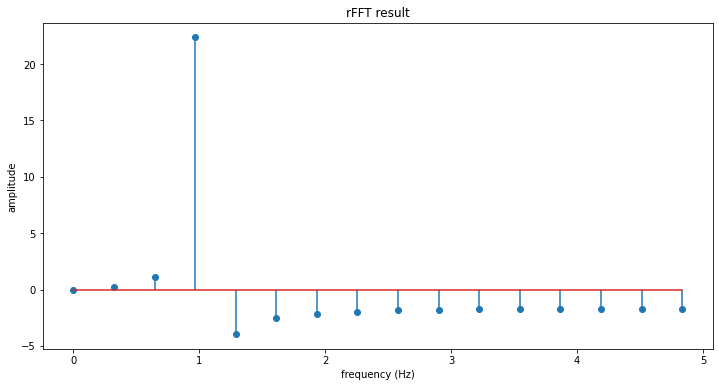

In [8]:
setup_graph(title='rFFT result', x_label='frequency (Hz)', y_label='amplitude', fig_size=(12,6))
plt.stem(rf, rfft_f)

### Scaling of values

There are negative values and the amplitude is not 5.

Magnitudes of components:

$$mag(i) = \frac{\sqrt{\Re(i)^2 + \Im(i)^2}}{N}$$

Magnitude of transform `A` can be calculated with `np.abs(A)`.

<StemContainer object of 3 artists>

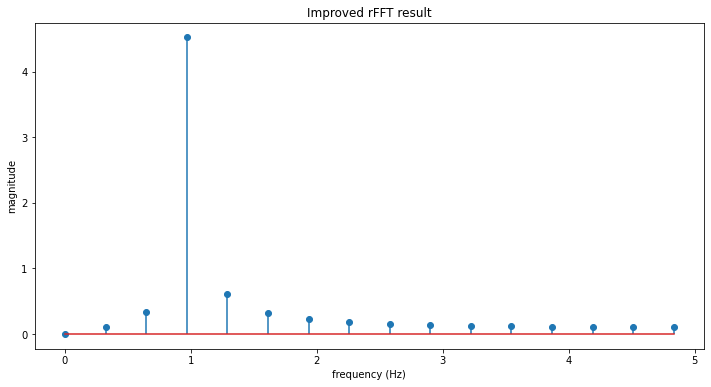

In [9]:
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(rfft_f) for i in rfft_f]

setup_graph(title='Improved rFFT result', x_label='frequency (Hz)', y_label='magnitude', fig_size=(12,6))
plt.stem(rf, rfft_mag)

Phase angle of transformed complex quantity `A` can be calculated with the function `np.angle(A):

<StemContainer object of 3 artists>

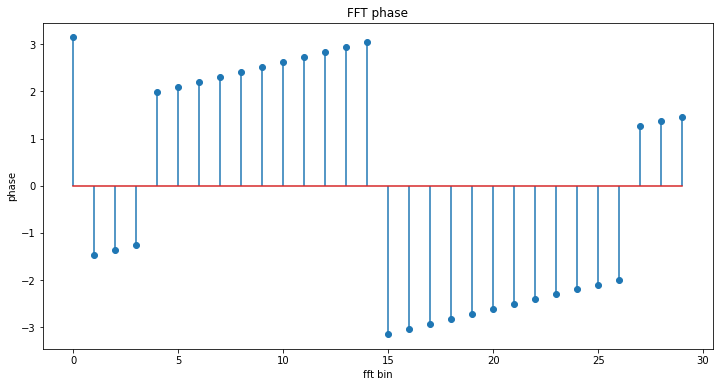

In [10]:
fft_phase = np.angle(fft_f)
setup_graph(title='FFT phase', x_label='fft bin', y_label='phase', fig_size=(12,6))
plt.stem(x, fft_phase)

### Why the 1 Hz sine signal has not been exactly reconstructed?

* FFT is not exact? - Let us calculate the inverse and compare it with the original signal.

## Inverse FFT

The original signal can be recovered from the FFT result with inverse FFT (with inverse real FFT - `irfft`).

Inverse transform is calculated using the following formula:
$$x[n] = \frac{1}{N} \sum_{n=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k] \, .$$

<StemContainer object of 3 artists>

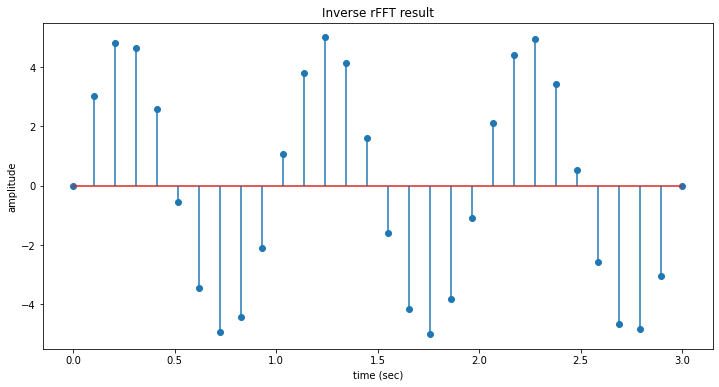

In [11]:
irfft_f = np.fft.irfft(rfft_f)

setup_graph(title='Inverse rFFT result', x_label='time (sec)', y_label='amplitude', fig_size=(12,6))
plt.stem(t, irfft_f)

Is there any difference between the original and inverse transformed transformed signal?

<StemContainer object of 3 artists>

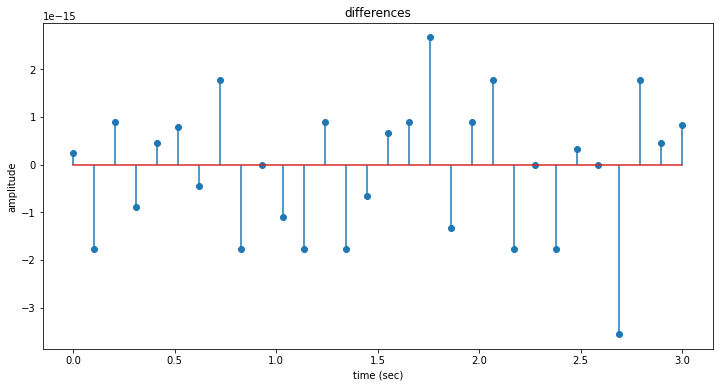

In [12]:
setup_graph(title='differences', x_label='time (sec)', y_label='amplitude', fig_size=(12,6))
plt.stem(t, irfft_f-s_f)

Disregarding round-off errors the original sine wave signal was recovered - hence the differences do not come from the FFT.

### Frequencies of the basis functions

Since the frequency of the signal to be analysed (1Hz) does not correspond to any of the frequencies of the basis functions (sine, cosine - these have a frequency difference of 0.32222222 Hz), hence signal amplitude is seen in the amplitudes of the basis functions that are close to 1 Hz.

Let us see what happens when signal frequency is an exact multiple of the sampling frequency:

10.00000 samples/second (Hz)


<StemContainer object of 3 artists>

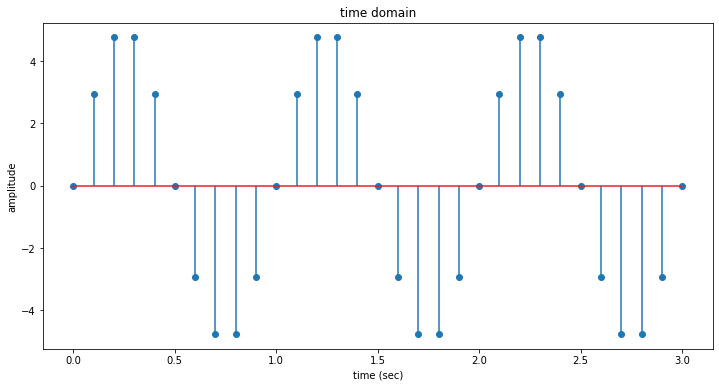

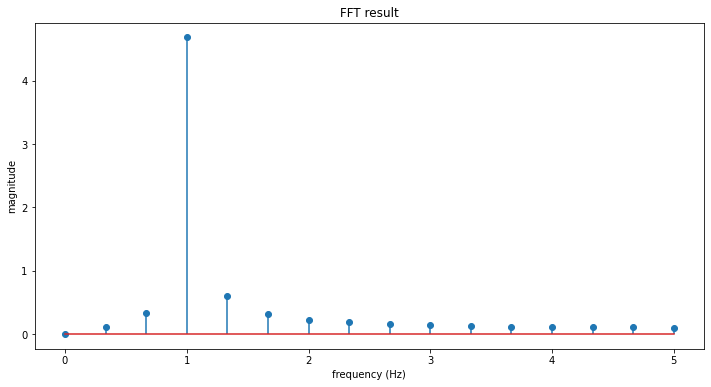

In [13]:
num_s = 31 # number of samples
mps = (num_s-1)/tmax # samples/second
print("%.5f samples/second (Hz)" % mps)

t = np.linspace(0, tmax, num_s)
f = lambda x: ampl * np.sin(f_hz * 2*np.pi*x)
s_f = [f(i) for i in t]  # new sampled f
setup_graph(title='time domain', x_label='time (sec)', y_label='amplitude', fig_size=(12,6))
plt.stem(t, s_f)

# calculate real FFT
rfft_f = np.fft.rfft(s_f)
rf = [(i*1.0/(num_s-1))*mps for i in range(num_s//2+1)]
rfft_mag = np.abs(rfft_f)/len(rfft_f)

setup_graph(title='FFT result', x_label='frequency (Hz)', y_label='magnitude', fig_size=(12,6))
plt.stem(rf, rfft_mag)

The result is still not exact: the reason is that last item of the sample should be ommitted. 
Fix it:

<StemContainer object of 3 artists>

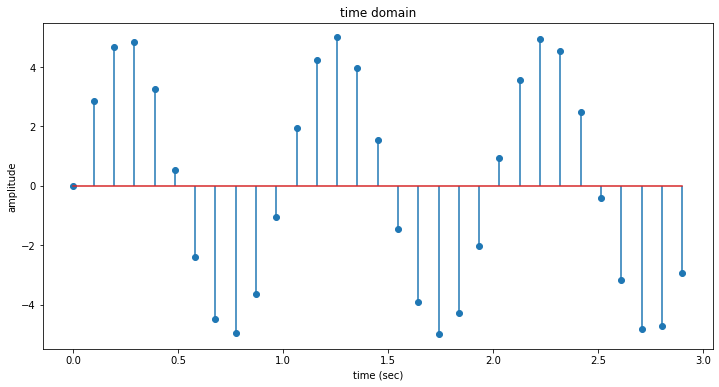

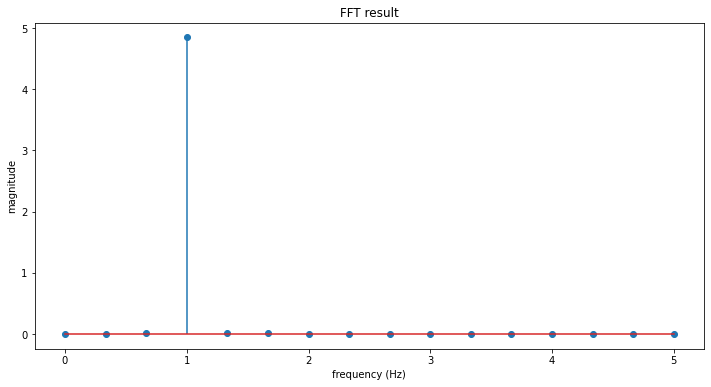

In [14]:
t = np.linspace(0, tmax-1.0/mps, num_s)
f = lambda x: ampl * np.sin(f_hz * 2*np.pi*x)
s_f = [f(i) for i in t]  # new resampled f
setup_graph(title='time domain', x_label='time (sec)', y_label='amplitude', fig_size=(12,6))
plt.stem(t, s_f)

# calculate real FFT
rfft_f = np.fft.rfft(s_f)
rf = [(i*1.0/(num_s-1))*mps for i in range(num_s//2+1)]
rfft_mag = np.abs(rfft_f)/len(rfft_f)

setup_graph(title='FFT result', x_label='frequency (Hz)', y_label='magnitude', fig_size=(12,6))
plt.stem(rf, rfft_mag)


Looks almost good, but there is a problem: the magnitude of the 1 Hz signal is not exactly 5. Why? Let us make a semi-logarithmic plot:

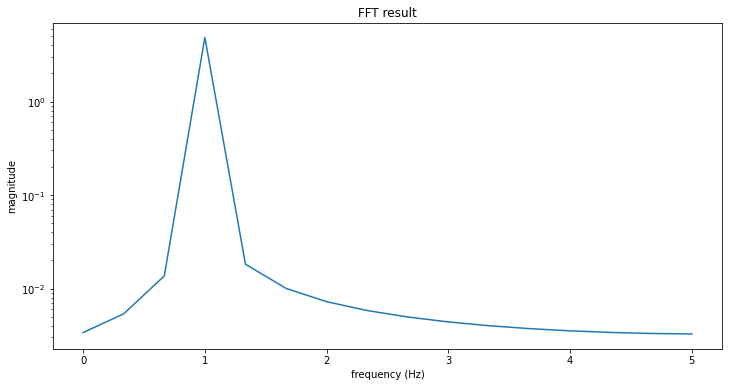

In [15]:
setup_graph(title='FFT result', x_label='frequency (Hz)', y_label='magnitude', fig_size=(12,6))
plt.semilogy(rf, rfft_mag)

Our result shows that some of the signal energy has been transferred or "leaked" to neighboring frequencies. This is spectral leakage, and its cause is that a signal of finite length can not have an exact frequency.

* finite length is the result of the procedure of cutting some part of an infinite 1 Hz sine wave signal
* this corresponds to a multiplication of the signal with a rectangular taper of unit amplitude
* result: convolution with the spectrum of this rectangular window (taper)

This effect can be reduced by applying a taper which is more smooth than the rectangular taper. This will be demonstrated next.

## Smooth tapering

Let us apply the Blackman taper:

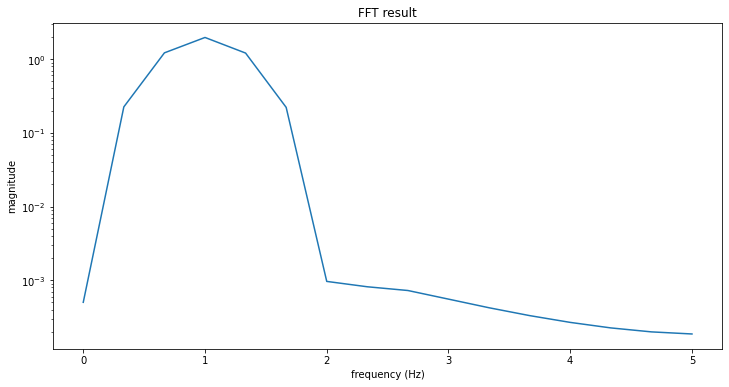

In [16]:
from scipy.signal.windows import blackman
N = len(s_f)
w = blackman(N)
ywf = np.fft.rfft(s_f*w)
ywf_mag = np.abs(ywf)/len(ywf)

setup_graph(title='FFT result', x_label='frequency (Hz)', y_label='magnitude', fig_size=(12,6))
plt.semilogy(rf, ywf_mag)

There is a cost: we see that magnitudes decreased below $10^{-3}$ for frequencies above 2 Hz, but at the cost of widening of the 1 Hz peak. Othewise the Blackman taper and its transform look like that:

<ipython-input-17-59f27f5d0f45>:13: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))


Text(0.5, 0, 'Normalized frequency [cycle/sample]')

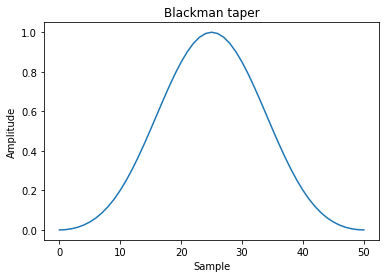

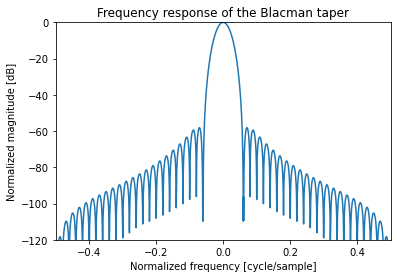

In [17]:
from scipy import signal
from scipy.fftpack import fft, fftshift

window = signal.windows.blackman(51)
plt.plot(window)
plt.title("Blackman taper")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Blacman taper")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycle/sample]")

## Sampling, aliasing

Consider spectra of 50 and 150 Hz sines:

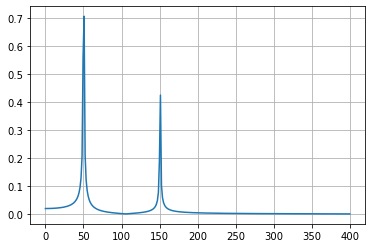

In [19]:
from scipy.fftpack import fft
import numpy as np
# Number of samples
N = 600
# sampling interval
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(150.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

What happens when sampling frequency is below 300 Hz, which is the highest frequency in the input signal?

Have a look:

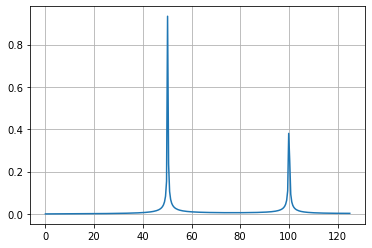

In [20]:
# sampling interval
T = 1.0 / 250.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(150.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Signal with frequency 150 Hz has been aliased to the false 100 Hz frequency!